In [2]:
import pandas as pd

In [3]:
crop = pd.read_csv(r'C:\Users\91984\Downloads\Crop_recommendation.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [5]:
#quantile transformer
from sklearn.preprocessing import QuantileTransformer
data1 = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]

scaler = QuantileTransformer()
# transform data
scaled5 = scaler.fit_transform(data1)
print(scaled5)

[[0.79029029 0.3993994  0.65165165 ... 0.56153913 0.5505967  0.94317576]
 [0.75325325 0.60760761 0.62612613 ... 0.4933901  0.79738274 0.96776204]
 [0.62862863 0.54704705 0.66516517 ... 0.57416821 0.96293297 0.98850434]
 ...
 [0.96646647 0.28978979 0.47297297 ... 0.36037433 0.46004816 0.86131554]
 [0.95845846 0.28678679 0.52602603 ... 0.17614039 0.67879976 0.75649169]
 [0.88638639 0.12812813 0.47297297 ... 0.25225963 0.69168953 0.7836081 ]]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled5,target,test_size = 0.2,random_state =2)

In [7]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [8]:
grid_params_rf = { 'n_estimators' : [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
               'criterion' : ['gini','entropy'],
               'max_features' : ['auto','sqrt','log2'],
              'class_weight' : ['balanced', 'balanced_subsample']}

In [9]:
gs_rf = GridSearchCV(RandomForestClassifier(), grid_params_rf, verbose = 1, cv=3, n_jobs = -1)

In [16]:
g_res_rf = gs_rf.fit(x_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.1min finished


In [17]:
g_res_rf.best_score_

0.9965918759314926

In [18]:
g_res_rf.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 40}

In [19]:
# Using the best hyperparameters
rf_1 = RandomForestClassifier(n_estimators = 40, criterion = 'gini',max_features = 'sqrt',class_weight = 'balanced_subsample')
rf_1.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_features='sqrt',
                       n_estimators=40)

In [20]:
# Training & Testing accuracy after applying hyper parameter
rf_train_accuracy = rf_1.score(x_train,y_train)
print("rf_train_accuracy = ",rf_1.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = rf_1.score(x_test,y_test)
print("rf_test_accuracy = ",rf_1.score(x_test,y_test))

rf_train_accuracy =  1.0
rf_test_accuracy =  0.9954545454545455


In [21]:
acc = []
model = []

In [22]:
from sklearn.metrics import classification_report
from sklearn import metrics

predicted_values = rf_1.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

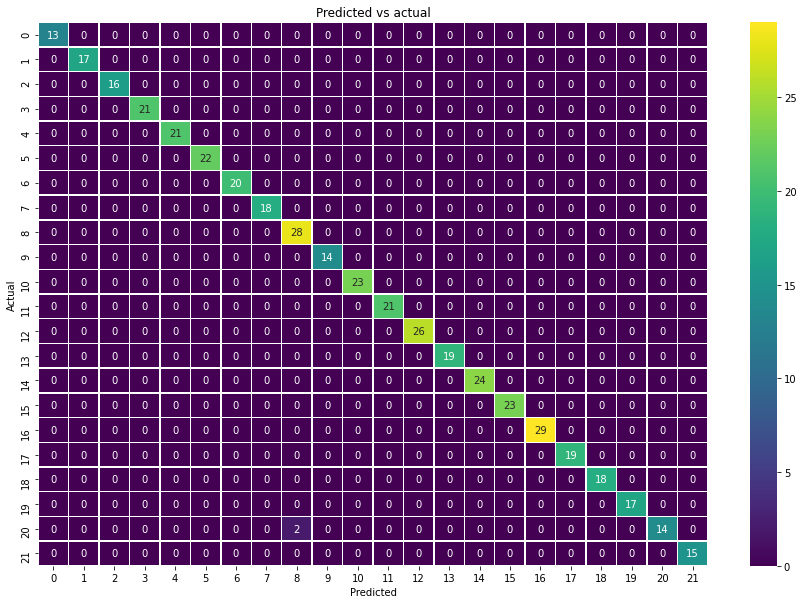

In [23]:
y_pred = rf_1.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cm_rf = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()